- Time Series Project
- Analysis and Prediction of Bitcoin
- Using Deep Learning: LSTM

- By: Yash Chauhan J017

In [1]:
import pandas as pd
import numpy as np
import tensorflow

In [2]:
# df=pd.read_csv('D:\Code\TS proj\lstm_dataset.csv')
# df.head()

,Date,ret_x,ret_x-1,ret_x-2,ret_x-3,ret_x-4,ret_x-5,ret_x-6,ret_x-7,ret_x-8,ret_x-9,ret_x-10
0,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-07,-0.106689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-11-08,-0.052711,-0.106689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-11-09,0.272294,-0.052711,-0.106689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-11-10,-0.662891,0.272294,-0.052711,-0.106689,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
DATA_DICT={}
pairings=[['DRREDDY.NS', 'INDUSINDBK.NS'], ['POWERGRID.NS','INDUSINDBK.NS'], ['DRREDDY.NS', 'HEROMOTOCO.NS'], ['SUNPHARMA.NS','INDUSINDBK.NS'], ['BRITANNIA.NS', 'INDUSINDBK.NS']]

In [3]:
for i in range(len(pairings)):
    name=f'{pairings[i][0]}_{pairings[i][1]}'
    DATA_DICT[name]=pd.read_csv(f'D:/Code/TS proj/lstm_dsets/lstm_dataset_{i}.csv')

In [5]:
# df.tail()

,Date,ret_x,ret_x-1,ret_x-2,ret_x-3,ret_x-4,ret_x-5,ret_x-6,ret_x-7,ret_x-8,ret_x-9,ret_x-10
1231,2022-10-31,-0.483910,-0.150966,0.771813,0.374180,0.696746,-0.972778,-2.026268,-0.653302,1.229855,1.046812,0.547979
1232,2022-11-01,1.517708,-0.483910,-0.150966,0.771813,0.374180,0.696746,-0.972778,-2.026268,-0.653302,1.229855,1.046812
1233,2022-11-02,-0.338132,1.517708,-0.483910,-0.150966,0.771813,0.374180,0.696746,-0.972778,-2.026268,-0.653302,1.229855
1234,2022-11-03,0.806413,-0.338132,1.517708,-0.483910,-0.150966,0.771813,0.374180,0.696746,-0.972778,-2.026268,-0.653302
1235,2022-11-04,-0.501194,0.806413,-0.338132,1.517708,-0.483910,-0.150966,0.771813,0.374180,0.696746,-0.972778,-2.026268


In [4]:
for name in DATA_DICT.keys():
    DATA_DICT[name].reset_index()['ret_x'].dropna()

In [7]:
# df1=df.reset_index()['ret_x'].dropna()

In [8]:
DATA_DICT.keys()

dict_keys(['DRREDDY.NS_INDUSINDBK.NS', 'POWERGRID.NS_INDUSINDBK.NS', 'DRREDDY.NS_HEROMOTOCO.NS', 'SUNPHARMA.NS_INDUSINDBK.NS', 'BRITANNIA.NS_INDUSINDBK.NS'])

In [9]:
DATA_DICT['DRREDDY.NS_INDUSINDBK.NS'].loc[848:1110]

,Date,ret_x,ret_x-1,ret_x-2,ret_x-3,ret_x-4,ret_x-5,ret_x-6,ret_x-7,ret_x-8,ret_x-9,ret_x-10
848,2021-04-15,-0.371285,-0.243791,-1.804375,0.158075,-0.601520,1.781295,0.148703,-3.154776,2.828495,-0.367718,1.708842
849,2021-04-16,0.760161,-0.371285,-0.243791,-1.804375,0.158075,-0.601520,1.781295,0.148703,-3.154776,2.828495,-0.367718
850,2021-04-19,-1.028435,0.760161,-0.371285,-0.243791,-1.804375,0.158075,-0.601520,1.781295,0.148703,-3.154776,2.828495
851,2021-04-20,2.679863,-1.028435,0.760161,-0.371285,-0.243791,-1.804375,0.158075,-0.601520,1.781295,0.148703,-3.154776
852,2021-04-22,-0.132393,2.679863,-1.028435,0.760161,-0.371285,-0.243791,-1.804375,0.158075,-0.601520,1.781295,0.148703
...,...,...,...,...,...,...,...,...,...,...,...,...
1106,2022-04-29,-0.376901,1.263717,-1.236143,2.265745,-1.614643,-2.962141,1.171836,1.448067,-1.576323,-0.468257,-0.922781
1107,2022-05-02,1.923432,-0.376901,1.263717,-1.236143,2.265745,-1.614643,-2.962141,1.171836,1.448067,-1.576323,-0.468257
1108,2022-05-04,-3.549587,1.923432,-0.376901,1.263717,-1.236143,2.265745,-1.614643,-2.962141,1.171836,1.448067,-1.576323
1109,2022-05-05,-2.478588,-3.549587,1.923432,-0.376901,1.263717,-1.236143,2.265745,-1.614643,-2.962141,1.171836,1.448067


In [10]:
int(len(DATA_DICT['DRREDDY.NS_INDUSINDBK.NS']) * 0.85)

1110

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

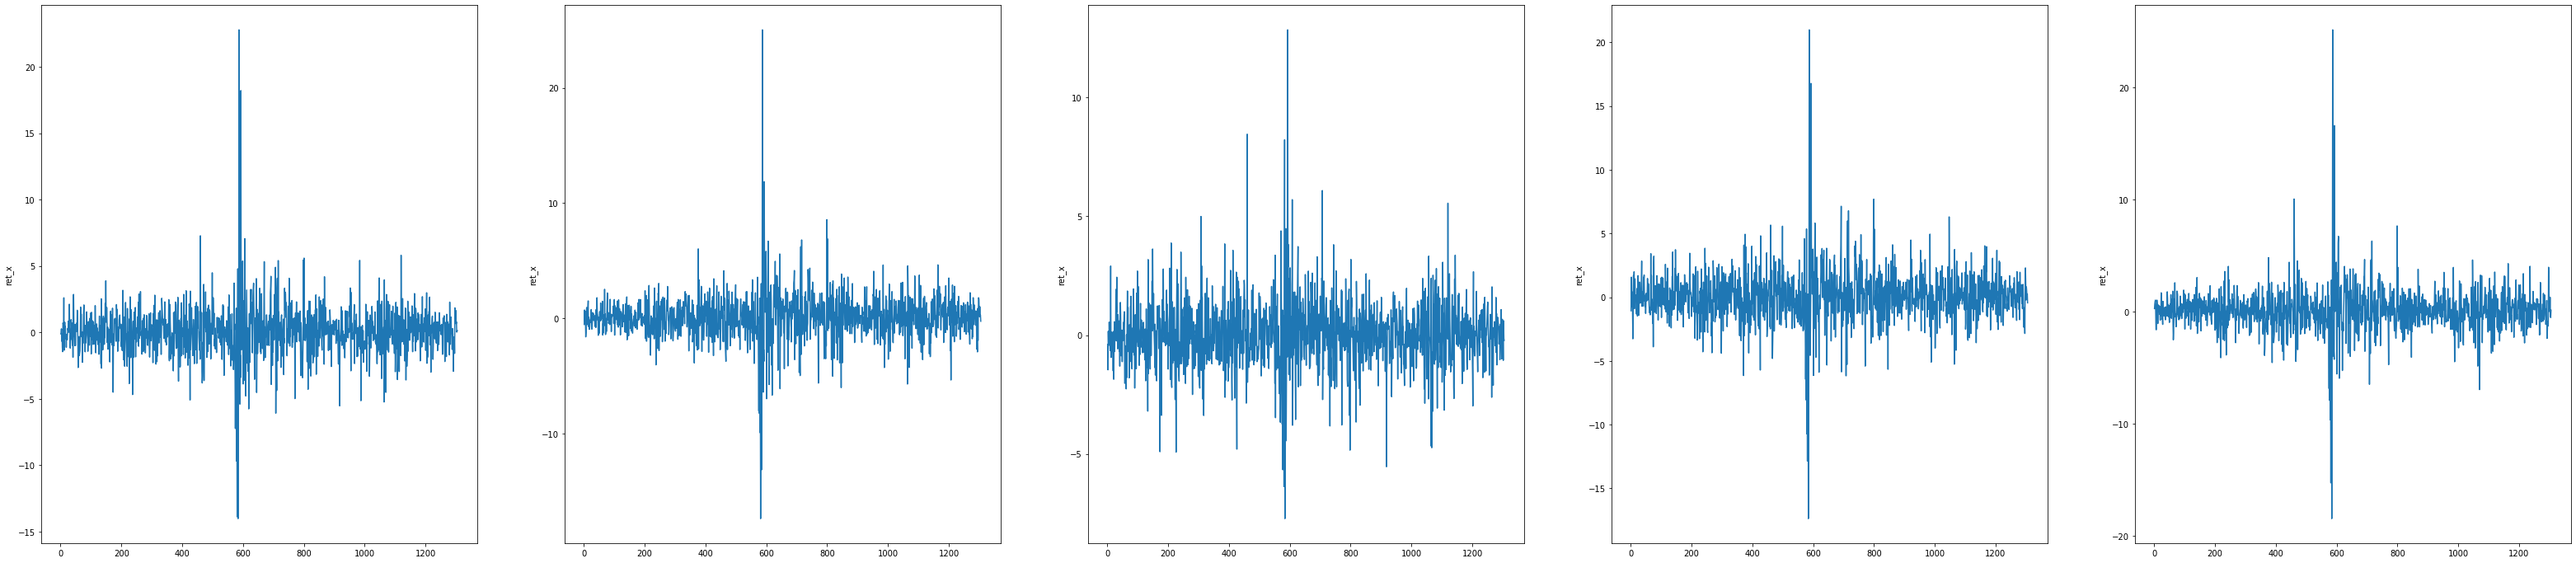

In [6]:
c=0
plt.figure(figsize=(55,12))
for name, df in DATA_DICT.items():
    plt.subplot(1, 5, c+1)
    sns.lineplot(data=df['ret_x'])
    c+=1

Scale the data using MinMax Scaler because LSTM sensitive to the scale

In [14]:
# from sklearn.preprocessing import MinMaxScaler

# scaler=MinMaxScaler(feature_range=(0,1))
# df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
# df1

array([[0.37798615],
       [0.37945247],
       [0.38828126],
       ...,
       [0.37169899],
       [0.40279066],
       [0.36726939]])

In [16]:
# df.loc[df.Date=='2022-11-01'].index[0]

1232

In [31]:
DATA_DICT['DRREDDY.NS_INDUSINDBK.NS']

,Date,ret_x,ret_x-1,ret_x-2,ret_x-3,ret_x-4,ret_x-5,ret_x-6,ret_x-7,ret_x-8,ret_x-9,ret_x-10
0,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-07,-0.106693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-11-08,-0.052718,-0.106693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-11-09,0.272303,-0.052718,-0.106693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-11-10,-0.662890,0.272303,-0.052718,-0.106693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,2023-02-08,0.642622,1.651504,1.058933,1.150536,1.847835,-1.581345,-0.333774,-1.053386,-0.373541,-2.924862,-0.665466
1302,2023-02-09,0.802094,0.642622,1.651504,1.058933,1.150536,1.847835,-1.581345,-0.333774,-1.053386,-0.373541,-2.924862
1303,2023-02-10,0.023113,0.802094,0.642622,1.651504,1.058933,1.150536,1.847835,-1.581345,-0.333774,-1.053386,-0.373541
1304,2023-02-13,0.113139,0.023113,0.802094,0.642622,1.651504,1.058933,1.150536,1.847835,-1.581345,-0.333774,-1.053386


In [7]:
training_dict={}
# val_dict={}
testing_dict={}
for name, df in DATA_DICT.items():
    training_size=df.loc[df.Date=='2022-09-01'].index[0]
    # val_size=df.loc[df.Date=='2022-11-01'].index[0]

    training_dict[name]=df.loc[0:training_size, 'ret_x'].dropna()
    # val_dict[name]=df.loc[training_size:val_size, 'ret_x'].dropna()
    testing_dict[name]=df.loc[training_size:, 'ret_x'].dropna()

    # val_dict[name].reset_index(drop=True, inplace=True)
    testing_dict[name].reset_index(drop=True, inplace=True)

In [18]:
testing_dict['DRREDDY.NS_INDUSINDBK.NS']

0     -0.327539
1     -0.623696
2      0.619298
3      0.332125
4     -0.730901
         ...   
110    0.642622
111    0.802094
112    0.023113
113    0.113139
114    0.129787
Name: ret_x, Length: 115, dtype: float64

In [19]:
# training_size=int(len(df1)*0.65)
# test_size=len(df1)-training_size
# train_data,test_data=df1[0:training_size],df1[training_size:len(df1)]

In [20]:
# test_data.reset_index(drop=True)

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

Create dataset matrix

In [8]:
def create_dataset(dataset, time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    
    return np.array(dataX), np.array(dataY)

In [9]:
X_trains={}
y_trains={}
# X_vals={}
# y_vals={}
X_tests={}
y_tests={}
time_step=100
for name in training_dict.keys():
    X_trains[name], y_trains[name]=create_dataset(training_dict[name], time_step)
    # X_vals[name], y_vals[name]=create_dataset(val_dict[name], time_step)
    X_tests[name], y_tests[name]=create_dataset(testing_dict[name], time_step)


In [ ]:
# training_dict['DRREDDY.NS_INDUSINDBK.NS'].shape[1]

In [23]:
# time_step = 100
# X_train, y_train = create_dataset(train_data, time_step)
# X_test, ytest = create_dataset(test_data.reset_index(drop=True), time_step)

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

Reshape the data for LSTM

In [10]:
for name in X_trains.keys():
    X_trains[name]=X_trains[name].reshape(X_trains[name].shape[0], X_trains[name].shape[1], 1)
    X_tests[name]=X_tests[name].reshape(X_tests[name].shape[0], X_tests[name].shape[1], 1)
    # X_vals[name]=X_vals[name].reshape(X_vals[name].shape[0], X_vals[name].shape[1], 1)

In [29]:
X_trains['DRREDDY.NS_INDUSINDBK.NS']

array([[[-0.10669297],
        [-0.05271802],
        [ 0.27230342],
        ...,
        [-0.28175324],
        [ 1.45729882],
        [ 0.52658875]],

       [[-0.05271802],
        [ 0.27230342],
        [-0.66288961],
        ...,
        [ 1.45729882],
        [ 0.52658875],
        [-1.6176395 ]],

       [[ 0.27230342],
        [-0.66288961],
        [-0.11299166],
        ...,
        [ 0.52658875],
        [-1.6176395 ],
        [ 1.51580623]],

       ...,

       [[ 1.58839024],
        [ 1.40063073],
        [-0.55888087],
        ...,
        [ 1.11121261],
        [ 1.35615248],
        [-0.30694905]],

       [[ 1.40063073],
        [-0.55888087],
        [-0.86805411],
        ...,
        [ 1.35615248],
        [-0.30694905],
        [-1.0989021 ]],

       [[-0.55888087],
        [-0.86805411],
        [ 0.6972782 ],
        ...,
        [-0.30694905],
        [-1.0989021 ],
        [-0.64879094]]])

In [ ]:
# X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [11]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [12]:
from keras import layers, models

In [13]:
model=models.Sequential()
model.add(layers.LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(layers.LSTM(50,return_sequences=True))
model.add(layers.LSTM(50))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
def get_model():
    model=models.Sequential()
    model.add(layers.LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(layers.LSTM(50,return_sequences=True))
    model.add(layers.LSTM(50))
    model.add(layers.Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')

    return model

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_name='model.h5'
checkpoint=ModelCheckpoint(
    model_name,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

early=EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0,
    verbose=1
)

In [17]:
train_preds={}
test_preds={}
# val_preds={}
for name in X_trains.keys():
    model=get_model()
    model.fit(X_trains[name], y_trains[name], epochs=100, batch_size=64)
    # model.load_weights(model_name)
    
    train_preds[name]=model.predict(X_trains[name])
    test_preds[name]=model.predict(X_tests[name])
    # val_preds[name]=model.predict(X_vals[name])

Epoch 1/100
18/18 [==============================] - 9s 156ms/step - loss: 4.0389
Epoch 2/100
18/18 [==============================] - 3s 164ms/step - loss: 3.9999
Epoch 3/100
18/18 [==============================] - 3s 144ms/step - loss: 3.9788
Epoch 4/100
18/18 [==============================] - 3s 158ms/step - loss: 3.9388
Epoch 5/100
18/18 [==============================] - 3s 150ms/step - loss: 3.8806
Epoch 6/100
18/18 [==============================] - 3s 152ms/step - loss: 3.7672
Epoch 7/100
18/18 [==============================] - 3s 158ms/step - loss: 3.6224
Epoch 8/100
18/18 [==============================] - 3s 173ms/step - loss: 3.1901
Epoch 9/100
18/18 [==============================] - 3s 163ms/step - loss: 1.3521
Epoch 10/100
18/18 [==============================] - 3s 156ms/step - loss: 0.8039
Epoch 11/100
18/18 [==============================] - 3s 146ms/step - loss: 0.6244
Epoch 12/100
18/18 [==============================] - 3s 152ms/step - loss: 0.5388
Epoch 13/100


In [ ]:
# model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1, callbacks=[checkpoint, early])

In [ ]:
# model.load_weights(model_name)

Predictions

In [ ]:
# train_predict=model.predict(X_train)
# test_predict=model.predict(X_test)

Back to normal scale (inverse transform)

In [ ]:
# train_predict=scaler.inverse_transform(train_predict)
# test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# test_preds['DRREDDY.NS_INDUSINDBK.NS'].shape

RMSE Metric

In [18]:
def mean_error(y_true, y_preds):
    return np.mean(y_true-y_preds)

In [19]:
print('Train Mean Errors:')
for name in train_preds:
    print(f'{name}: {mean_error(y_trains[name], train_preds[name])}')

Train Mean Errors:
DRREDDY.NS_INDUSINDBK.NS: 0.03101982599244594
POWERGRID.NS_INDUSINDBK.NS: -0.0193612372963849
DRREDDY.NS_HEROMOTOCO.NS: 0.01812323043696858
SUNPHARMA.NS_INDUSINDBK.NS: 0.05180895050307233
BRITANNIA.NS_INDUSINDBK.NS: -0.052423946604563766


In [20]:
print('Test Mean Errors:')
for name in test_preds:
    print(f'{name}: {mean_error(y_tests[name], test_preds[name])}')

Test Mean Errors:
DRREDDY.NS_INDUSINDBK.NS: 0.041037617923044084
POWERGRID.NS_INDUSINDBK.NS: -0.04277274646654537
DRREDDY.NS_HEROMOTOCO.NS: -0.01794158668653405
SUNPHARMA.NS_INDUSINDBK.NS: -0.001751128804925686
BRITANNIA.NS_INDUSINDBK.NS: -0.11457431924951365


In [ ]:
# import math
# from sklearn.metrics import mean_squared_error
# math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
# math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
# np.squeeze(train_predict).shape, trainPredictPlot[look_back:len(train_predict)+look_back].shape

In [ ]:
# np.squeeze(train_preds['DRREDDY.NS_INDUSINDBK.NS']).shape

In [ ]:
# testPredictPlot[len(train_preds['DRREDDY.NS_INDUSINDBK.NS'])+len(val_preds[name])+(look_back*2)+1:len(df)-1].shape

In [ ]:
DATA_DICT['DRREDDY.NS_INDUSINDBK.NS']

,Date,ret_x,ret_x-1,ret_x-2,ret_x-3,ret_x-4,ret_x-5,ret_x-6,ret_x-7,ret_x-8,ret_x-9,ret_x-10
0,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-07,-0.106693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-11-08,-0.052718,-0.106693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-11-09,0.272303,-0.052718,-0.106693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-11-10,-0.662890,0.272303,-0.052718,-0.106693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,2023-02-08,0.642622,1.651504,1.058933,1.150536,1.847835,-1.581345,-0.333774,-1.053386,-0.373541,-2.924862,-0.665466
1302,2023-02-09,0.802094,0.642622,1.651504,1.058933,1.150536,1.847835,-1.581345,-0.333774,-1.053386,-0.373541,-2.924862
1303,2023-02-10,0.023113,0.802094,0.642622,1.651504,1.058933,1.150536,1.847835,-1.581345,-0.333774,-1.053386,-0.373541
1304,2023-02-13,0.113139,0.023113,0.802094,0.642622,1.651504,1.058933,1.150536,1.847835,-1.581345,-0.333774,-1.053386


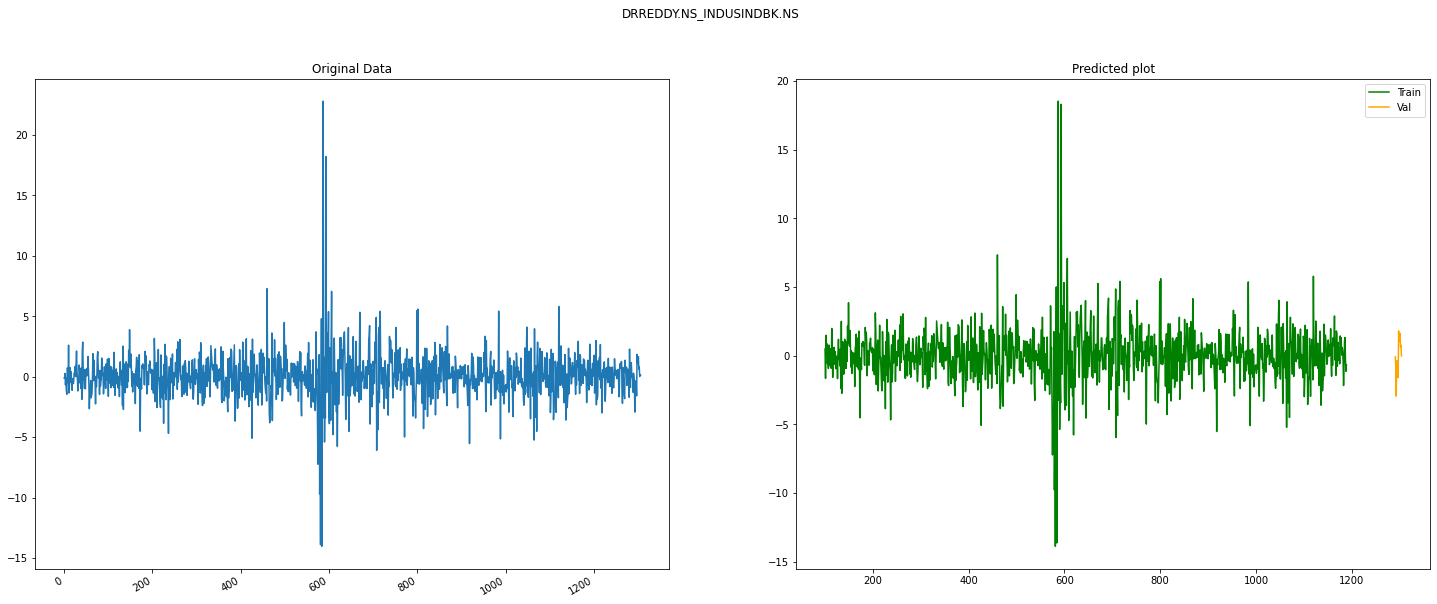

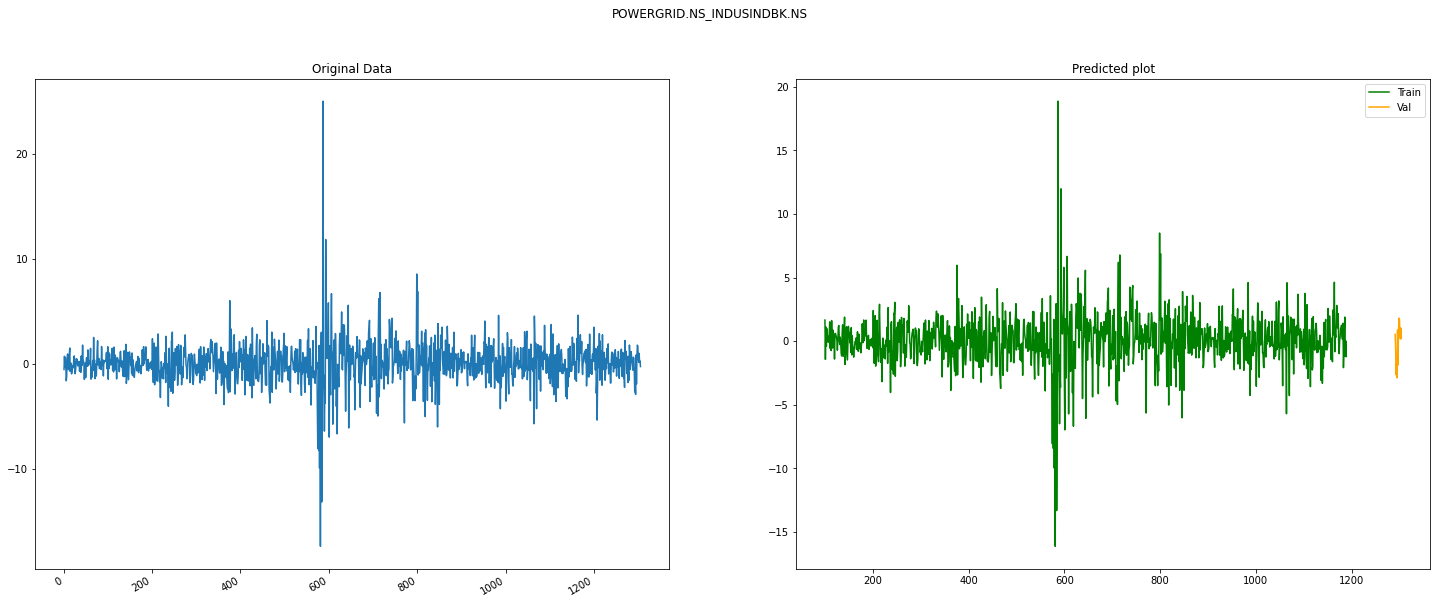

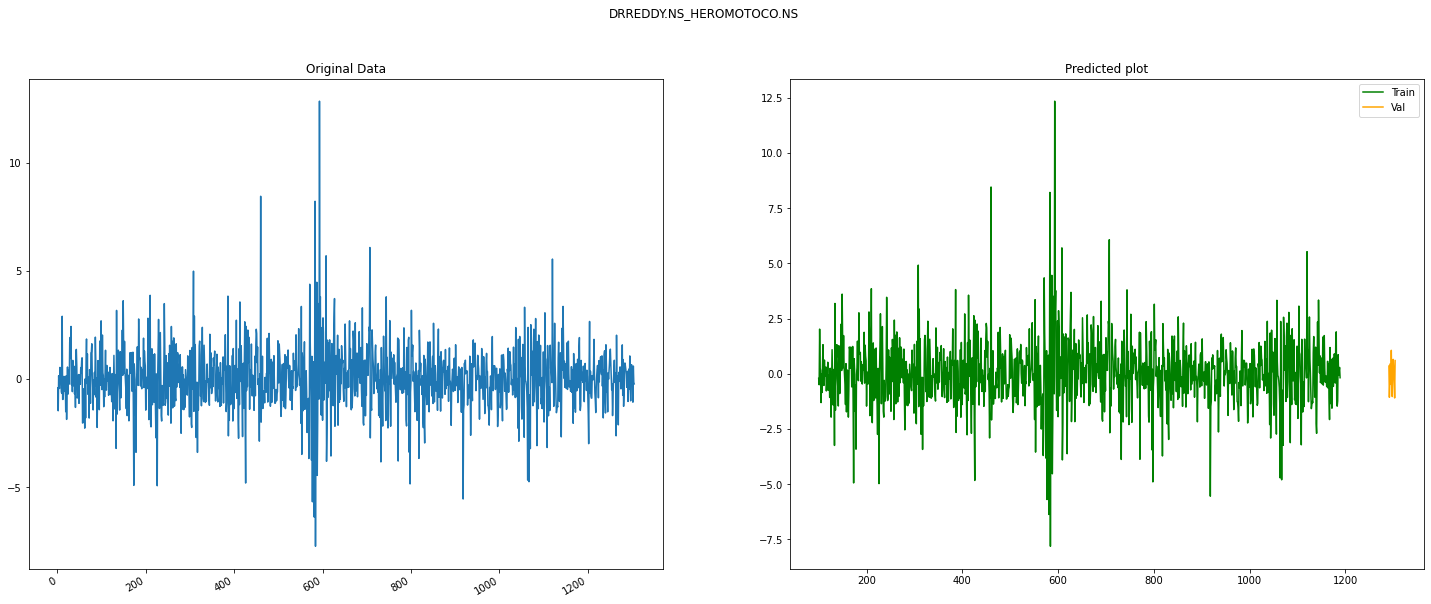

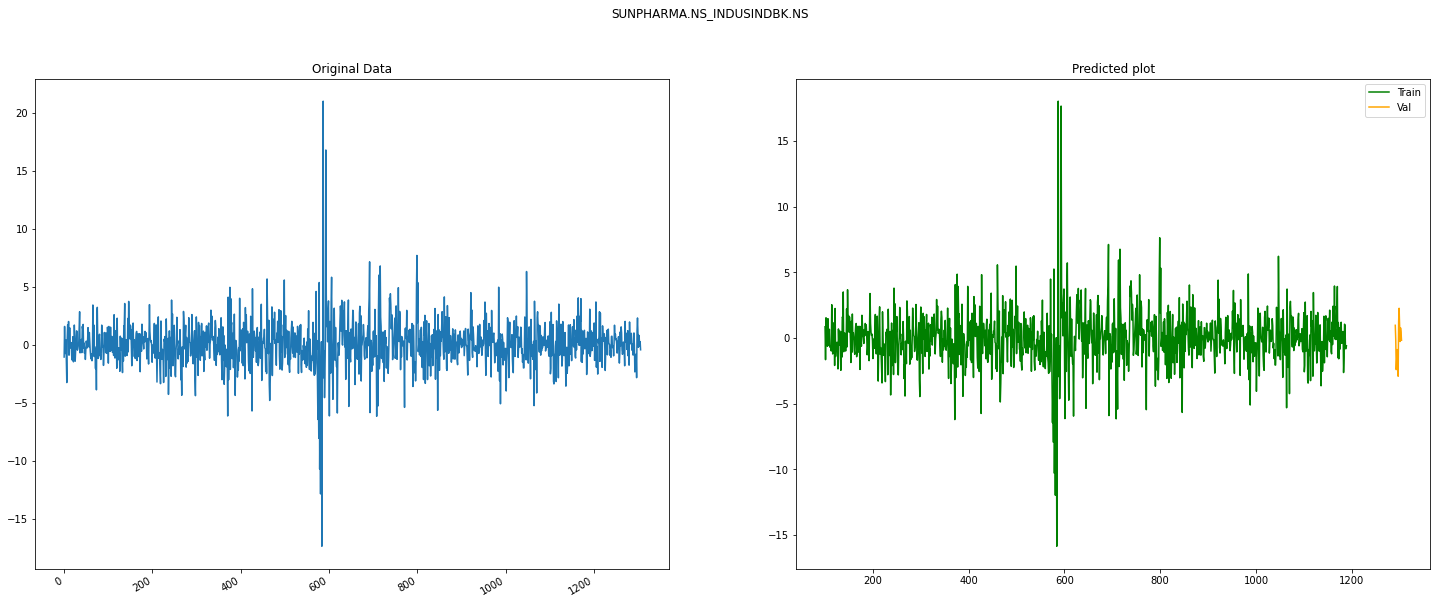

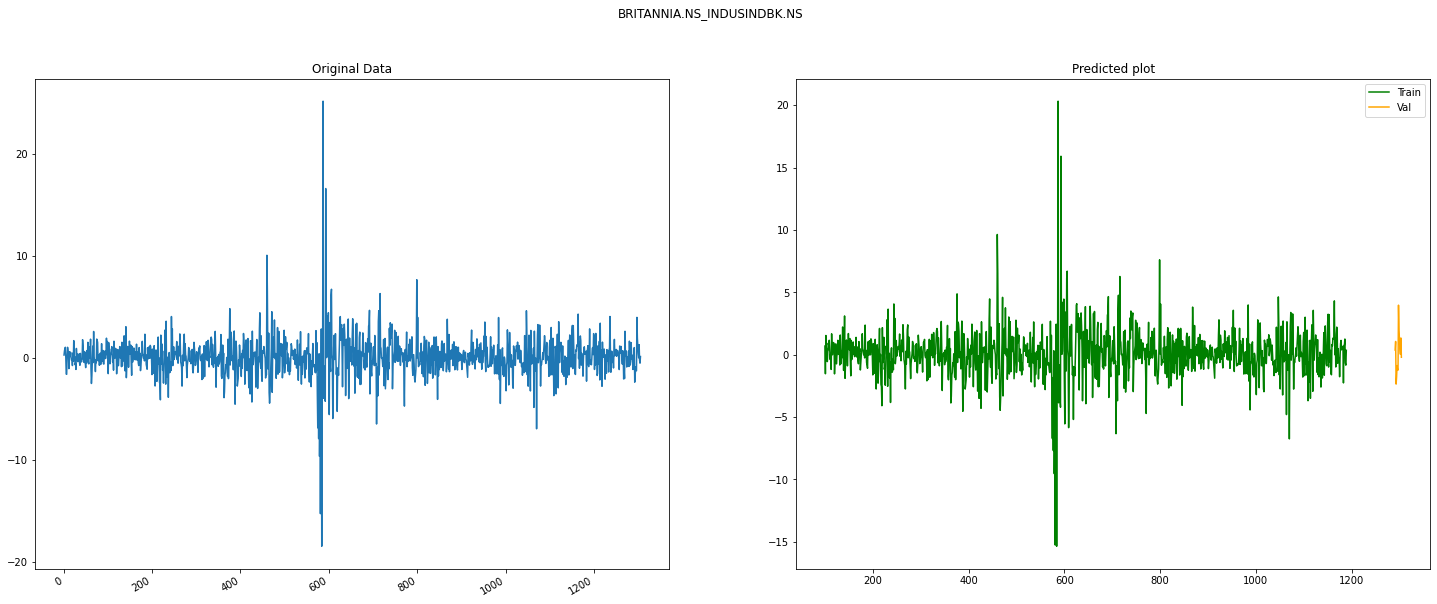

In [22]:
import matplotlib.pyplot as plt
look_back=100
c=1
for name, df in DATA_DICT.items():
    trainPredictPlot = np.empty_like(df.ret_x)
    trainPredictPlot[:] = np.nan
    trainPredictPlot[look_back:len(train_preds[name])+look_back] = np.squeeze(train_preds[name])

    # valPredictPlot = np.empty_like(df.ret_x)
    # valPredictPlot[:] = np.nan
    # valPredictPlot[len(train_preds[name])+(look_back*2)+1:val_size] = np.squeeze(val_preds[name])

    # # shift test predictions for plotting
    testPredictPlot = np.empty_like(df.ret_x)
    testPredictPlot[:] = np.nan
    testPredictPlot[len(train_preds[name])+(look_back*2)+1:len(df)-1] = np.squeeze(test_preds[name])
    # plot baseline and predictions
    
    plt.figure(figsize=(25, 10))
    plt.subplot(1,2,1)
    plt.suptitle(name)
    plt.title('Original Data')
    plt.plot(df.ret_x)
    plt.gcf().autofmt_xdate()
    plt.subplot(1,2,2)
    plt.title('Predicted plot')
    plt.plot(trainPredictPlot, c='green')
    # plt.plot(valPredictPlot, c='orange')
    plt.plot(testPredictPlot, c='orange')
    plt.legend(['Train', 'Val', 'Test'])
    plt.show()

    c+=1

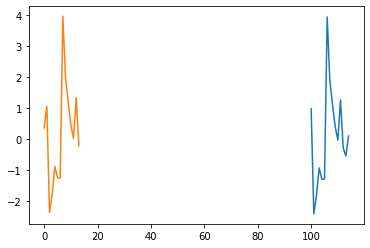

In [23]:
plt.plot(testing_dict['BRITANNIA.NS_INDUSINDBK.NS'][-15:])
plt.plot(test_preds['BRITANNIA.NS_INDUSINDBK.NS'])

In [ ]:
# trainPredictPlot.shape

Future Predictions

In [ ]:
# test_data.shape

In [ ]:
# x_input=test_data[-100:].reshape(1,-1)
# x_input.shape

In [ ]:
# temp_input=list(x_input)
# temp_input=temp_input[0].tolist()

In [ ]:
# from numpy import array

# lst_output=[]
# n_steps=100
# i=0
# while(i<30):
    
#     if(len(temp_input)>100):
#         #print(temp_input)
#         x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
#         x_input=x_input.reshape(1,-1)
#         x_input = x_input.reshape((1, n_steps, 1))
#         #print(x_input)
#         yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
#         temp_input.extend(yhat[0].tolist())
#         temp_input=temp_input[1:]
#         #print(temp_input)
#         lst_output.extend(yhat.tolist())
#         i=i+1
#     else:
#         x_input = x_input.reshape((1, n_steps,1))
#         yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
#         temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
#         lst_output.extend(yhat.tolist())
#         i=i+1
    

# print(lst_output)

In [ ]:
# day_new=np.arange(1,101)
# day_pred=np.arange(101,131)

In [ ]:
# df1.shape

In [ ]:
# plt.plot(day_new,scaler.inverse_transform(df1[2860:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
# df3=df1.tolist()
# df3.extend(lst_output)
# plt.plot(df3[1200:])